# Clickbait detector (English tweets)

---



Objetivo: implementar un detector de clickbait en tweets publicados por medios de comunicación en inglés (por ejemplo: “Donald Trump wants everything about America to be strong. He just announced one big exception.”). Para ello dispones de un dataset que puedes usar para entrenar y evaluar un modelo predictivo. La tarea tiene los siguientes requisitos:

## 1. 
Descarga el dataset [Webis-Clickbait](https://webis.de/data/webis-clickbait-17.html) en formato CSV de los siguientes enlaces: training https://ml-coding-test.s3.eu-west-1.amazonaws.com/webis_train.csv y test https://ml-coding-test.s3.eu-west-1.amazonaws.com/webis_test.csv. El texto del tweet se encuentra en la columna postText, y su etiqueta en la columna truthClass.

In [1]:
!wget https://ml-coding-test.s3.eu-west-1.amazonaws.com/webis_train.csv; wget https://ml-coding-test.s3.eu-west-1.amazonaws.com/webis_test.csv

--2022-06-12 13:38:35--  https://ml-coding-test.s3.eu-west-1.amazonaws.com/webis_train.csv
Resolving ml-coding-test.s3.eu-west-1.amazonaws.com (ml-coding-test.s3.eu-west-1.amazonaws.com)... 52.218.104.99
Connecting to ml-coding-test.s3.eu-west-1.amazonaws.com (ml-coding-test.s3.eu-west-1.amazonaws.com)|52.218.104.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93472103 (89M) [text/csv]
Saving to: ‘webis_train.csv’

webis_train.csv     100%[===================>]  89.14M  21.2MB/s    in 5.1s    

2022-06-12 13:38:41 (17.4 MB/s) - ‘webis_train.csv’ saved [93472103/93472103]

--2022-06-12 13:38:41--  https://ml-coding-test.s3.eu-west-1.amazonaws.com/webis_test.csv
Resolving ml-coding-test.s3.eu-west-1.amazonaws.com (ml-coding-test.s3.eu-west-1.amazonaws.com)... 52.218.89.216
Connecting to ml-coding-test.s3.eu-west-1.amazonaws.com (ml-coding-test.s3.eu-west-1.amazonaws.com)|52.218.89.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9

In [2]:
! pwd; ls -ltrh .

/content
total 176M
-rw-r--r-- 1 root root  90M Mar 16 11:55 webis_train.csv
-rw-r--r-- 1 root root  86M Mar 16 11:55 webis_test.csv
drwxr-xr-x 1 root root 4.0K Jun  1 13:50 sample_data


## 2.
Crea un notebook con la solución a las tareas indicadas más abajo. Te recomendamos utilizar Google Colab para disponer de recursos de cómputo gratuitos.

In [1]:
!nvidia-smi # check resource/memory

Sun Jun 12 18:21:20 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
#! rm -rf drive/
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
root = "/content/drive/MyDrive/Research/clickbait/"

Mounted at /content/drive


In [4]:
!mv *.csv /content/drive/MyDrive/Research/clickbait/ds/
!ls -ltrh /content/drive/MyDrive/Research/clickbait/ds/

mv: cannot stat '*.csv': No such file or directory
total 176M
-rw------- 1 root root 86M Jun 12 13:39 webis_test.csv
-rw------- 1 root root 90M Jun 12 13:39 webis_train.csv


## 3.
Incluye un análisis descriptivo de los datos. Céntrate en los aspectos que vayan a ser más importantes para el funcionamiento del modelo.

In [5]:
import numpy as np
import pandas as pd

root_ds = f'{root}/ds/'
df_train = pd.read_csv(f'{root_ds}webis_train.csv')
df_test = pd.read_csv(f'{root_ds}webis_test.csv')

In [6]:
df_train.info()
df_test.info()

# split?
n_train = df_train.shape[0]
n_test = df_test.shape[0]
n_ = n_train + n_test
print("total",n_,"train",n_train,"test",n_test)
# %
print("train",(n_train*100)/n_,"test",(n_test*100)/n_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19538 entries, 0 to 19537
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         19538 non-null  int64  
 1   postMedia          19538 non-null  object 
 2   postText           19484 non-null  object 
 3   id                 19538 non-null  int64  
 4   targetCaptions     19538 non-null  object 
 5   targetParagraphs   19538 non-null  object 
 6   targetTitle        19538 non-null  object 
 7   postTimestamp      19538 non-null  object 
 8   targetKeywords     12309 non-null  object 
 9   targetDescription  18595 non-null  object 
 10  truthJudgments     19538 non-null  object 
 11  truthMean          19538 non-null  float64
 12  truthClass         19538 non-null  object 
 13  truthMedian        19538 non-null  float64
 14  truthMode          19538 non-null  float64
dtypes: float64(3), int64(2), object(10)
memory usage: 2.2+ MB
<class 'pand

In [7]:
print(df_train.sample(3))


       Unnamed: 0                               postMedia  \
3755         3755  ['media/photo_807351308441133057.jpg']   
2916         2916  ['media/photo_832472670243430400.jpg']   
10981       10981  ['media/photo_824675803195645953.jpg']   

                                                postText                  id  \
3755    19 memes about periods that are too fucking real  808182346516144128   
2916   FBI: South Carolina man arrested after threate...  832472673196191744   
10981  Jay Z shuns Donald Trump question, recalls mee...  824675805976465408   

                                          targetCaptions  \
3755                                                  []   
2916                                                  []   
10981  ['Neilson Barnard/Getty Images for Spike TV Ja...   

                                        targetParagraphs  \
3755   ['Another month with no baby and your uterus w...   
2916   ['A white supremacist with felony convictions ...   
10981  ["On W

In [8]:
stat = df_train["truthClass"].value_counts()
clickbait = (stat["clickbait"]*100)/(df_train.shape[0])
no_clickbait = 100-clickbait
stat,clickbait,no_clickbait

(no-clickbait    14777
 clickbait        4761
 Name: truthClass, dtype: int64, 24.367898454294195, 75.63210154570581)

In [9]:
stat2 = df_test["truthClass"].value_counts()
clickbait2 = (stat2["clickbait"]*100)/(df_test.shape[0])
no_clickbait2 = 100-clickbait2
stat2,clickbait2,no_clickbait2

(no-clickbait    14464
 clickbait        4515
 Name: truthClass, dtype: int64, 23.789451499025237, 76.21054850097477)

In [10]:
# Check for Null values
df_train.isnull().sum(),'---------',df_test.isnull().sum()

(Unnamed: 0              0
 postMedia               0
 postText               54
 id                      0
 targetCaptions          0
 targetParagraphs        0
 targetTitle             0
 postTimestamp           0
 targetKeywords       7229
 targetDescription     943
 truthJudgments          0
 truthMean               0
 truthClass              0
 truthMedian             0
 truthMode               0
 dtype: int64, '---------', Unnamed: 0              0
 id                      0
 postMedia               0
 targetCaptions          0
 postText               66
 postTimestamp           0
 targetTitle             0
 targetDescription     924
 targetKeywords       7054
 targetParagraphs        0
 truthJudgments          0
 truthClass              0
 truthMedian             0
 truthMode               0
 truthMean               0
 dtype: int64)

In [11]:
df_train["postText_len"] = df_train["postText"].apply(str).str.len()
df_train["postText_tokens"] = df_train["postText"].apply(str).apply(lambda a: len(a.split()))
#
df_train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,19538.0,NaN,NaN,NaN,9768.5,5640.279115,0.0,4884.25,9768.5,14652.75,19537.0
postMedia,19538,10307,[],9232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postText,19484,19081,Quote of the day:,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,19538.0,NaN,NaN,NaN,831439319154438912.0,15694234791846908.0,804113781580328960.0,817834574700043264.0,831656319216185344.0,844940385037291520.0,858464162594172928.0
targetCaptions,19538,15004,[],2320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
targetParagraphs,19538,19016,"['Still Watching?', 'Rotate Device']",32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
targetTitle,19538,18845,CBSN - Live Streaming Video News Channel,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postTimestamp,19538,19471,Sat Feb 25 03:01:48 +0000 2017,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
targetKeywords,12309,11328,",",158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
targetDescription,18595,17892,CBSN is a live 24/7 streaming video news chann...,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_test["postText_len"] = df_test["postText"].apply(str).str.len()
df_test["postText_tokens"] = df_test["postText"].apply(str).apply(lambda a: len(a.split()))
#
df_test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,18979.0,NaN,NaN,NaN,9489.0,5478.909715,0.0,4744.5,9489.0,14233.5,18978.0
id,18979.0,NaN,NaN,NaN,831401164266829184.0,15716177125630972.0,804115815670906880.0,817797700334848000.0,831312442798067712.0,845150060281151488.0,858465168795332608.0
postMedia,18979,10241,[],8739,NaN,NaN,NaN,NaN,NaN,NaN,NaN
targetCaptions,18979,14554,[],2347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postText,18913,18533,Quote of the day:,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postTimestamp,18979,18914,Sun Dec 18 05:14:34 +0000 2016,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
targetTitle,18979,18336,NBC NewsVerifizierter Account,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
targetDescription,18055,17453,CBSN is a live 24/7 streaming video news chann...,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
targetKeywords,11925,10978,",",167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
targetParagraphs,18979,18500,"['Still Watching?', 'Rotate Device']",20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Probamos tres enfoques con los datos:

- 3.1 Los datos como se proporcionaron
- 3.2 Outliers fuera
- 3.2 Quedarse solamente con las etiquetas con más acuerdo, según truthMean (promedio o media de los 5 anotadores)

In [13]:
# función p/ extraer un set de train para validación
'''
df_test p/ calcular dev sobre el 10% de train+test y,
dev es el % a utilizar p/ validar, probamos con un 10%
'''
def train_dev_set(df_train,df_test=None,dev=0.10):
  df_dev = df_train.copy().sample(frac=1,random_state=42)
  if df_test:
    # train 40%, dev 10%, test 50%
    tot_train = len(df_train)
    tot_all = tot_train+len(df_test)
    percentage = 1-(((tot_all*dev))/tot_train)
    print(percentage)
  else:
    # train 100% split: train 90%, dev 10%,
    percentage = 1-dev
  msk = np.random.rand(len(df_dev)) < percentage
  train = df_dev[msk]
  dev = df_dev[~msk]

  print(train.shape, dev.shape)

  return train, dev


## 3.1.
Datos "como están"

In [14]:
split_all = train_dev_set(df_train) # train original
df_train_all = split_all[0]
df_dev_all = split_all[1]

(17551, 17) (1987, 17)


## 3.2.
Quitando Outliers... Tukey method (Tukey JW., 1977) para detectar ouliers que define un rango intercuartílico comprendido entre el 1er y 3er cuartil de los valores de la distribución (IQR). Valores atípicos como filas que tienen al menos dos valores numéricos atípicos. Tomando text length, tokens y la mean de los anotadores.


In [15]:
import ast
df_train["truthJudgmentsArray"] = df_train["truthJudgments"].apply(ast.literal_eval)
df_train["truthStd"] = df_train["truthJudgmentsArray"].apply(lambda a: np.std(np.array(a)))
df_train[["truthStd","truthMean","truthJudgments","truthClass"]].sample(10)

,truthStd,truthMean,truthJudgments,truthClass
13279,0.326599,0.266667,"[0.0, 0.6666666666000001, 0.6666666666000001, ...",no-clickbait
16254,0.298142,0.333333,"[0.6666666666000001, 0.0, 0.0, 0.3333333333000...",no-clickbait
13705,0.388730,0.400000,"[1.0, 0.6666666666000001, 0.33333333330000003,...",no-clickbait
5682,0.266667,0.133333,"[0.0, 0.6666666666000001, 0.0, 0.0, 0.0]",no-clickbait
4982,0.163299,0.200000,"[0.33333333330000003, 0.33333333330000003, 0.0...",no-clickbait
10990,0.266667,0.200000,"[0.6666666666000001, 0.0, 0.0, 0.0, 0.33333333...",no-clickbait
17269,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]",no-clickbait
14690,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]",no-clickbait
13027,0.163299,0.133333,"[0.0, 0.33333333330000003, 0.0, 0.0, 0.3333333...",no-clickbait
15605,0.266667,0.133333,"[0.0, 0.0, 0.6666666666000001, 0.0, 0.0]",no-clickbait


In [16]:
from collections import Counter

# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers
Outliers_to_drop = detect_outliers(df_train,2,["truthMean","truthStd","postText_len","postText_tokens"])
df_train[["postText","postMedia","truthClass","truthMean","truthStd","postText_len","postText_tokens"]].loc[Outliers_to_drop] # Show the outliers rows

,postText,postMedia,truthClass,truthMean,truthStd,postText_len,postText_tokens
624,kek,[],clickbait,1.0,0.0,3,1
878,Wat.,[],clickbait,1.0,0.0,4,1
2312,NaN,[],clickbait,1.0,0.0,3,1
2322,NaN,[],clickbait,1.0,0.0,3,1
2570,Suicide.,[],clickbait,1.0,0.0,8,1
3428,SHOCK:,[],clickbait,1.0,0.0,6,1
3709,Shocker.,[],clickbait,1.0,0.0,8,1
5494,💅,[],clickbait,1.0,0.0,1,1
5664,Ooooooooooooohhhh,[],clickbait,1.0,0.0,17,1
6025,wat,[],clickbait,1.0,0.0,3,1


Son tweets cortos de un solo token, sin mucho contexto y votación unánime.

In [17]:
df_train_outliers = df_train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
df_train_outliers.shape, len(Outliers_to_drop)

((19515, 19), 23)

In [18]:
split_wo_outliers = train_dev_set(df_train_outliers) # train without outliers
df_train_wo_outliers = split_wo_outliers[0]
df_dev_wo_outliers = split_wo_outliers[1]

(17567, 19) (1948, 19)


## 3.3.
- Quitando anotaciones conflictivas: entre 0.3 and 0.7, y
- Quitando anotaciones que se desvíen: entre 0.2 y 0.5

(éstos son tweets con poca confianza al distinguir entre clickbait y no)

In [19]:
df_train["truthStd"].max(),df_train["truthStd"].min(),df_train["truthStd"].sample().tolist()

(0.48989794855663565, 0.0, [0.13333333335999997])

In [20]:
def detect_low_confidence_agree(df,col_mean="truthMean",col_std="truthStd"):
  # Determine a list of indices to exclude
  disagree_list_col = df[((df[col_mean] < 0.7) & (df[col_mean] > 0.3)) & (df[col_std] > 0.2)].index

  print("train",df_train.shape[0]-disagree_list_col.shape[0])

  return disagree_list_col

# detect disagree
disagree_to_drop = detect_low_confidence_agree(df_train)
df_train[["postText","postMedia","truthClass","truthMean","truthStd","postText_len","postText_tokens"]].loc[disagree_to_drop] # Show the disagree rows

train 13270


,postText,postMedia,truthClass,truthMean,truthStd,postText_len,postText_tokens
2,"The ""forgotten"" Trump roast: Relive his brutal...",[],no-clickbait,0.466667,0.339935,89,15
6,"Despite the ‘Yuck Factor,’ Leeches Are Big in ...",[],no-clickbait,0.333333,0.365148,62,10
8,"Malls are dying, but it's hard to profit from ...",['media/photo_858153570478305281.jpg'],no-clickbait,0.333333,0.210819,68,13
11,"Players to know, QBs to watch and more 👀\n\nGu...",['media/photo_858069152451354625.jpg'],clickbait,0.600000,0.326599,75,16
15,NFL Draft 2017: The 20 best remaining players ...,[],no-clickbait,0.533333,0.400000,57,11
...,...,...,...,...,...,...,...
19526,We'll always have Newsweek.,[],clickbait,0.666667,0.421637,27,4
19527,What to do if your Android's been hit by the G...,['media/photo_804379537232564224.jpg'],no-clickbait,0.466667,0.339935,61,12
19529,18 uplifting documentaries guaranteed to put a...,"['media/photo_804356723351945216.jpg', 'media/...",clickbait,0.533333,0.339935,65,11
19531,Just one glass of white a day can raise risk o...,[],no-clickbait,0.333333,0.365148,77,16


In [21]:
df_train_disagree = df_train.drop(disagree_to_drop, axis = 0).reset_index(drop=True)
df_train_disagree.shape, len(disagree_to_drop)

((13270, 19), 6268)

In [22]:
split_agree = train_dev_set(df_train_disagree) # train with strong agree confidence
df_train_agree = split_agree[0]
df_dev_agree = split_agree[1]

(11965, 19) (1305, 19)


## 4.
Crea un modelo de detección de clickbait en tweets, utilizando la técnica de fine-tuning de un modelo pre-entrenado de tipo BERT (es decir, son válidos cualquier checkpoint de BERT o modificaciones como RoBERTa, XLM, etc). Puedes utilizar librerías y checkpoints como Huggingface Transformers, o cualquier otro a tu elección. Deberías entregar como mínimo una solución, y adicionalmente una comparativa entre varias soluciones modificando el modelo, sus parámetros o incorporando otras ideas, opcionalmente añadiendo baselines más simples no basados en Transformers.

## 4.1.
Probamos con RoBERTa, en base a esta comparativa:
 https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9617586.
Elegimos a XLM-RoBERTa-base, que al ser tweets, intentar explotar la multilingualidad que pudiera haber, no es mala idea, y esta versión, está entrendada con muchos datos.

En cuanto a los splits, están en 50%/50% practicamente (train/test). Dedicimos utilizar el 10% del conjunto de train obtenido para cada caso (ver sección 3) para validar el entrenamiento.

 ------

In [24]:
! pip install git+https://github.com/huggingface/transformers.git#@v4.5.1 sentencepiece emoji
#! pip install git+https://github.com/wandb/client.git
!pip install wandb -qqq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-aqck1a4e
  Running command git clone -q https://github.com/huggingface/transformers.git /tmp/pip-req-build-aqck1a4e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.2 MB 8.9 MB/s 
     |████████████████████████████████| 175 kB 41.1 MB/s 
     |████████████████████████████████| 6.6 MB 51.2 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 596 kB 64.9 MB/s 
  Created wheel for transformers: filename=transformers-4.20.0.dev0-py3-none-any.whl size=4392293 sha256=1d9d93d40346a504822a96fdfc0923c3e9d67d03d57e1e95f83f4eb9ceaf1147
  Stored in directory: /tmp/pip-ephem-wheel-cache-1_uhrqkb/wheels/90/a5/44/6bcd83827c8a60628c5ad602f429cd5076bcce5f2a90054

In [25]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, AutoConfig,Trainer, TrainingArguments, BertweetTokenizer, BertConfig
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import f1_score, balanced_accuracy_score, mean_squared_error, confusion_matrix
import torch
import wandb
import os
import random
import re
import gc

In [26]:
class WandbTrainer(Trainer):
    def evaluate(self, eval_dataset= None, ignore_keys=None):
        outputMetrics = super().evaluate(eval_dataset, ignore_keys)

        wandb.log(outputMetrics)

        return outputMetrics

class gn_dataset(Dataset):
    def __init__(self,data,labels,tokenizer):
        self.data = data
        self.labels = labels
        self.tokenizer = tokenizer

    def processText(self,text):
        tokenized = self.tokenizer(text, truncation=True)

        return tokenized

    def __len__(self):
        return len(self.data.index)

    def __getitem__(self,i):
        row = self.data.iloc[i]
        x = self.processText(row['x']).data

        try:
            y = self.labels.index(row['y'])
        except:
            y = len(self.labels) - 1 

        x['labels'] = y
        return x

    def randomItem(self):
        return self.__getitem__(random.randint(0,self.__len__()))

class Model:
    def __init__(self,modelPath = 'dccuchile/bert-base-spanish-wwm-uncased',nLabels = 3, labels=None):
        self.device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu") # put cpu for more extensive error desc...
        self.maxLength = 128 

        self.nLabels = nLabels

        self.loadModel(modelPath) 

        self.labels = labels

    def model_init(self,dropout = 0.1):
        config = AutoConfig.from_pretrained(
            self.MODEL_PATH,
            num_labels=self.nLabels,
            return_dict = True,
            hidden_dropout_prob = dropout
        )

        #return AutoModel.from_pretrained(self.MODEL_PATH,config=config).to(self.device)
        return AutoModelForSequenceClassification.from_pretrained(self.MODEL_PATH,config=config).to(self.device)

    def computeMetrics(self,evalPrediction):
        yPred = evalPrediction.predictions.argmax(1)
        yTrue = evalPrediction.label_ids

        metrics = {}

        # mine
        # original paper: https://link.springer.com/chapter/10.1007/978-3-319-30671-1_72/tables/2 / ROC-AUC, Precision, Recall
        metrics['balanced_accuracy'] = balanced_accuracy_score(yTrue, yPred) # deal with imbalanced datasets
        metrics['accuracy'] = (yPred == yTrue).mean()
        metrics['f1_macro'] = f1_score(yTrue, yPred, average='macro') # Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
        metrics['mean_squared_error'] = mean_squared_error(yTrue, yPred)
        if 'click' in self.labels[0]:
          indexes = [i for i,x in enumerate(self.labels) if x == 'clickbait']
          print(indexes[0], self.labels)
          metrics['f1_binary'] = f1_score(yTrue, yPred, average='binary',pos_label=indexes[0])
        # cm
        metrics['confusion_matrix'] = str(confusion_matrix(yTrue, yPred))
        print(metrics['confusion_matrix'])

        return metrics

    def loadModel(self,modelPath):
        self.MODEL_PATH = modelPath
        self.MODEL = self.model_init()
        self.TOKENIZER = AutoTokenizer.from_pretrained(self.MODEL_PATH,model_max_length = self.maxLength, use_fast=True)

    def saveModel(self,saveDir):
        self.MODEL.save_pretrained(saveDir)
        self.TOKENIZER.save_pretrained(saveDir)

    def hyperparametersSearchTraining(self,saveDir,checkpointDir,trainingData,validationData,testData,labels,wandbProjectName):
        trainDataset = gn_dataset(trainingData,labels,self.TOKENIZER)
        validationDataset = gn_dataset(validationData,labels,self.TOKENIZER)
        testDataset = gn_dataset(testData,labels,self.TOKENIZER)

        checkpoints = {}

        # TRAIN FUNCTION
        def trainWandb():
            runName = experiment + str(len(checkpoints))
            run = wandb.init(project='clickbait',name = runName)
            config = dict(run.config)

            
            args = TrainingArguments(
                                    output_dir=checkpointDir,
                                    do_train=True, # DEFAULT: False
                                    do_eval=True, # DEFAULT: False
                                    do_predict=True, # DEFAULT: False
                                    #evaluate_during_training=True, # DEFAULT: False
                                    save_steps = 0, # DEFAULT: 500
                                    eval_steps = 400, #200, # DEFAULT: 500
                                    evaluation_strategy = 'steps', # DEFAULT: "no"
                                    logging_first_step = True, # DEFAULT: False
                                    disable_tqdm = False, # DEFAULT: None
                                    dataloader_num_workers = 2, # 6, DEFAULT: 0
                                    learning_rate = config['learning_rate'],
                                    num_train_epochs = config['num_train_epochs'],
                                    per_device_train_batch_size = config['per_device_train_batch_size'],
                                    per_device_eval_batch_size = config['per_device_train_batch_size'],#16,
                                    weight_decay = config['weight_decay'],
                                    warmup_steps = 0, # DEFAULT: 0
                                    logging_dir=checkpointDir+"/logs",
                                    load_best_model_at_end = True, # DEFAULT: False
                                    metric_for_best_model = 'f1_binary', # DEFAULT: None
                                    greater_is_better = True, # DEFAULT: None
                                    #warmup_ratio= config['warmup_ratio'],
                                    #seed= config['seed'],
                                    #adam_epsilon= config['adam_epsilon'],
                                    # optimizer tuple (Adam correct_bias True|False)
                                    #
                                    report_to="wandb",  # enable logging to W&B
                                    #run_name=runName,  # name of the W&B run (optional)
            )
            
            model = self.model_init(config['dropout'])
            
            trainer = WandbTrainer(
                            model,
                            args = args,
                            train_dataset = trainDataset,#train
                            tokenizer = self.TOKENIZER,
                            eval_dataset = validationDataset,#dev
                            compute_metrics = self.computeMetrics,
            )

            trainer.train()
            
            cp = checkpointDir + '/CheckPointModel_'+ runName

            checkpoints[cp] = trainer.evaluate(testDataset)#test

            print(checkpoints[cp]) #trainer.predict(testDataset)

            trainer.save_model(cp)
            del cp

        # WANDB CONFIGURATION AND EXECUTION
        wandb.login()
        
        # ft: https://arxiv.org/pdf/2006.04884.pdf
        sweep_config = {
            'name': experiment,
            'method': 'bayes',# 'bayes' or 'random'
            'metric':
            {
                'name': 'eval_f1_binary',
                'goal': 'maximize'
            },              
            'parameters': 
            {
                "weight_decay": 
                {
                    'distribution': 'uniform',
                    'min': 0.0,
                    'max': 0.3
                    #'values': [0.04088]
                    #'values': [0.0] # 0.0 DEFAULT, 0.05 NCRFpp
                },
                "learning_rate": 
                {
                    'distribution': 'uniform',
                    'min': 1e-5, #2e-5,#1e-5 for Multi / 1e-6 min
                    'max': 6e-5  #3e-5 #5e-5 for Multi / 9e-5 max
                    # 2e-5 and 3e-5/5e-5 BETO/mBERT | 1e-5 and 5e-5 ours
                    #'values': [0.00002584]
                    #'values': [5e-5, 4e-5, 3e-5, 2e-5] # 5e-05 DEFAULT, 2e-5 NCRFpp
                },
                "per_device_train_batch_size":  
                {
                    #'values': [1,2,4]
                    'values': [8,16,32] # 8 DEFAULT, 1,2 only for XLM-1028, for others set [16,32] 
                },
                "num_train_epochs":
                {
                    'min':10, #3, 30 10
                    'max':20 #5, 50 40 20
                    # original 10 and 20 / ours 3 and 50
                    #'values': [39]
                    #'values': [20] # 3 DEFAULT, NCRFpp 10, ours: 20
                },
                'dropout':
                {
                    'distribution': 'uniform',
                    'min': 0.1,
                    'max': 0.6, 
                    #'values': [0.3221]
                    #'values': [0.1], #0.1 DEFAULT, 0.5 NCRFpp
                },
                #'warmup_ratio': #ft                                 
                #{
                #    'values': [0.0, 0.1] # default:0.0
                #},
                #'adam_epsilon': #ft                               
                #{
                #    'values': [1e-8,1e-6] # default:1e-8
                #},
                #'seed': #ft                                 
                #{
                #    'values': [42]+random.sample(range(1, 100), 24) # default:42 
                #}
            },
            'early_terminate':
            {
                'type': 'hyperband',
                'max_iter': 18, #4 6
                's': 2,  
                #'eta': 2, # 3 default
                # max_iter / eta (s times) 9 / 3 ([3, 1])
            }
        }

        sweep_id = wandb.sweep(sweep_config,project=wandbProjectName)
        wandb.agent(sweep_id=sweep_id, project = wandbProjectName,function=trainWandb)

        bestModelCheckpoint = ''
        bestmetric = 0
        for model in checkpoints :
            if checkpoints[model]['eval_f1_binary'] > bestmetric:
                bestModelCheckpoint = model
                bestmetric = checkpoints[model]['eval_f1_binary']

        print('BEST MODEL:',bestModelCheckpoint)
        self.loadModel(bestModelCheckpoint)
        self.saveModel(saveDir)

        wandb.finish()

    def predict(self,text):
        dataset = gn_dataset(None,None,self.TOKENIZER)
        batchEncoding = dataset.processText(text).to(self.device)

        self.MODEL.eval()
        out = self.MODEL(batchEncoding.input_ids,attention_mask = batchEncoding.attention_mask,token_type_ids = batchEncoding.token_type_ids,return_dict = True)

        return out.logits.argmax().item()

In [27]:
def normalize_sentence(sentence, replace_url=False, replace_usr=False):
    if not replace_url and not replace_usr:
        #print(replace_url,replace_usr)
        return sentence
    new_sentence = []
    for word in sentence.split(" "):
        #print(word)
        # @mentions, @users
        if (word.startswith("@") or word.startswith('"@')) and replace_usr:
            new_sentence.append('@user')
        # URL: https, http
        elif (word.startswith("http:") or word.startswith("https:")) and replace_url:
            new_sentence.append('internet_site')
        else:
            new_sentence.append(word)
    # remove extra " "
    new_sentence = re.sub(' +', ' ', " ".join(new_sentence))
    return new_sentence.strip()
#normalize_sentence('Hola "@fulano", soy @mengano, además este es mi sitio web https://hola.com/es/15/jui.html',True,True)

In [28]:
def get_dataset(df_train,df_dev,df_test,root,replace_url=False,replace_usr=False):

  trainDataset = df_train[['postText','truthClass']].copy()
  trainDataset['x'] = trainDataset.postText.astype(str).apply(lambda a: normalize_sentence(a,replace_url,replace_usr))
  trainDataset['y'] = trainDataset.truthClass.str.strip()
  print('Total amount of train',len(trainDataset.index))

  validationDataset = df_dev[['postText','truthClass']].copy()
  validationDataset['x'] = validationDataset.postText.astype(str).apply(lambda a: normalize_sentence(a,replace_url,replace_usr))
  validationDataset['y'] = validationDataset.truthClass.str.strip()
  print('Total amount of dev',len(validationDataset.index))

  testDataset = df_test[['postText','truthClass']].copy()
  testDataset['x'] = testDataset.postText.astype(str).apply(lambda a: normalize_sentence(a,replace_url,replace_usr))
  testDataset['y'] = testDataset.truthClass.str.strip()
  print('Total amount of test',len(testDataset.index))

  return trainDataset, validationDataset, testDataset

trainDataset, validationDataset, testDataset = get_dataset(df_train_all,df_dev_all,df_test,root="/content/drive/MyDrive/Research/clickbait/")
#trainDataset, validationDataset, testDataset = get_dataset(df_train_wo_outliers,df_dev_wo_outliers,df_test,root="/content/drive/MyDrive/Research/clickbait/")
#trainDataset, validationDataset, testDataset = get_dataset(df_train_agree,df_dev_agree,df_test,root="/content/drive/MyDrive/Research/clickbait/")


labels = list(set(trainDataset.truthClass.tolist()))
labels.sort(key=lambda item: (-len(item), item), reverse=True)
nLabels = len(labels)
print(labels, nLabels)

Total amount of train 17552
Total amount of dev 1986
Total amount of test 18979
['clickbait', 'no-clickbait'] 2


In [29]:
wandbProjectName = 'clickbait'
def train(name,root,nLabels,labels,experiment,trainDataset,validationDataset,testDataset,wandbProjectName): 
  print(name,experiment)
  model = Model(name,nLabels,labels)
  analysis = model.hyperparametersSearchTraining(root+"Modelos/"+experiment,root+name.split('/')[-1]+"TrainingCheckpoints",trainDataset,validationDataset,testDataset,labels,wandbProjectName = wandbProjectName)
  return True


In [30]:
#!wandb login --relogin

In [ ]:
# CHECK
gc.collect()
with torch.no_grad():
    torch.cuda.empty_cache()
!nvidia-smi # out of memory

launch = {
'MBERT': 'bert-base-multilingual-uncased', #0
'BETO': 'dccuchile/bert-base-spanish-wwm-uncased', #1
'XLM15L': "xlm-mlm-tlm-xnli15-1024", #2
'BERT': "bert-base-uncased", #3
'XRoBERTa': "xlm-roberta-base", #4
'BERTW': "vinai/bertweet-base", #5
'MBERTc': 'bert-base-multilingual-cased', #6
'BETOc': 'dccuchile/bert-base-spanish-wwm-cased', #7
'RoBERTa': 'roberta-base',
#---ours---
# nothing
}

experiment = list(launch.keys())[4]+"_clickbait"
#experiment = list(launch.keys())[4]+"_clickbait_wo_outlier"
#experiment = list(launch.keys())[4]+"_clickbait_agree"

model = launch['XRoBERTa']

# wandb
%env WANDB_PROJECT=clickbait
!echo $WANDB_PROJECT

train(model,root,nLabels,labels,experiment,trainDataset,validationDataset,testDataset,wandbProjectName) 


# 5.
Evalúa tu solución en el conjunto de test proporcionado. Elige las métricas que consideres más adecuadas para el problema y añade un párrafo interpretando tus resultados.

## 5.1. Métricas

Las métricas comunes parece ser F1 y accuracy. La F1 calculada sobre la clase positiva, al ser binaria, sería, clickbait. Además para comprender mejor el problema, se agrega F1-macro y balanced accuracy, para saber cómo de bueno es el modelo detectando cada clase.. clickbaits o no.

## 5.2. Resultados
En todos los casos, se utilizaron hyperparams buscando mejor F1 (binario, sobre la clase "clickbait"). Fue una búsqueda [bayesiana](https://docs.wandb.ai/guides/sweeps/configuration#method), con [early stop](https://docs.wandb.ai/guides/sweeps/configuration#early_terminate) de 3. 
### 5.2.1 Tabla
Los resultados se pueden también ver [aquí](https://wandb.ai/mmaguero/clickbait/table?workspace=user-mmaguero) con los params para lograrlos. En **negrita** los mejores para cada enfoque, y también en <u>**subrayado**</u>, el mejor para el problema de detección de outliers.

| Run | F1       | macro-F1 | Acc.     | macro-Acc. |
|-----|----------|----------|----------|------------|
|  <td colspan=5>"Dataset completo" (XROBERTa_clickbait)|
| 0   | **0.6846** | **0.7914** | 0.846    | **0.7966**   |
| 1   | 0.6738   | 0.7889   | 0.8517 | 0.7802     |
| 0(2)| 0.3844   | 0.1922   | 0.2379     | 0.5 |
| 0(3)| 0.3844   | 0.1922   | 0.2379     | 0.5 |
| 1(3)| 0.6743   | 0.7901   | **0.854**  | 0.7788 |
| 2   | 0.6609   | 0.783    | 0.8516     | 0.7678 |
|  <td colspan=5>"Sin outliers" (XROBERTa_clickbait_wo_outlier)|
| 0   | 0.6664 | 0.7852 | 0.8509 | 0.7735 |
| 1   | 0.663  | 0.783  | 0.8494 | 0.7714 |
| 2   | **0.685**  | **0.796**  | **0.8564** | **0.7876** |
| 3   | 0.6704 | 0.7877 | 0.8524 | 0.7763 |
| 4   | 0.6653 | 0.7861 | 0.8543 | 0.7699 |
|  <td colspan=5>"Con buen acuerdo entre anotadores" (XROBERTa_clickbait_agree)|
| 0   | 0.6677 | 0.7879 | 0.8559 | 0.7709 |
| 1   | 0.7064 | 0.8107 | 0.8683 | 0.7987 |
| 2   | <u>**0.7112**</u> | <u>**0.8134**</u> | <u>**0.8693**</u> | <u>**0.803**</u>  |
| 3   | 0.6969 | 0.8067 | 0.869  | 0.7879 |
| 4   | 0.7053 | 0.8104 | 0.8686 | 0.7971 |



**Comentarios**
En este experimento se ve que fue acertado excluir las anotaciones con baja confianza, dónde los anotadores tenía bajo acuerdo. Con esto el modelo aprende de ejemplos bien marcados de clickbait o no. Esto se ve claro contra modelos que tuvieron en cuenta todo el set de datos. Por otro lado, excluir los outliers no fue tan beneficio como quitarse las anotaciones problemáticas, pero resultó un poco mejor que solamente entrenar todo el dataset. A priori, parece que se podría probar entre excluir las anotaciones de baja confianza y luego, además, los outliers, y ver cómo se comporta el modelo, si gana perfomance.

# 6.
Incluye un pequeño análisis de errores del conjunto de test que permita entender mejor cómo falla el modelo.

# 6.1. Confusion Matrix
Se incluye una matriz de confusión p/ el mejor entendimiento de c/ enfoque ...

In [23]:
# ['clickbait', 'no_clickbait']
agree = np.array([[ 3054, 1461], #4515
                [ 1019, 13445]]) #14464
wo_outliers = np.array([[ 2964, 1551],
                        [ 1175, 13289]])  #
all = np.array([[ 3171, 1344], 
                [ 1578, 12886]]
)  #

In [24]:
classifiers = { "XLM-RoBERTa-all": all, "XLM-RoBERTa-wo-outliers": wo_outliers, "XLM-RoBERTa-agree": agree}

In [28]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

def print_confusion_matrix(classifiers,root):
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

  for cls, ax in zip(classifiers, axes.flatten()):
      ConfusionMatrixDisplay(classifiers[cls], 
                            display_labels=['Clickbait','No Clickbait']
                            ).plot(
                                include_values=True, cmap='gist_yarg', xticks_rotation='horizontal', values_format='d', ax=ax)
      
      ax.set_title(cls, fontsize=24)
      ax.tick_params(labelsize=15)

  plt.tight_layout()
  plt.figure(dpi=600) 
  plt.show()
  fig.savefig(root+'confusion_matrix.pdf', bbox_inches='tight', dpi=1200, format='pdf')

  return root+'confusion_matrix.pdf'

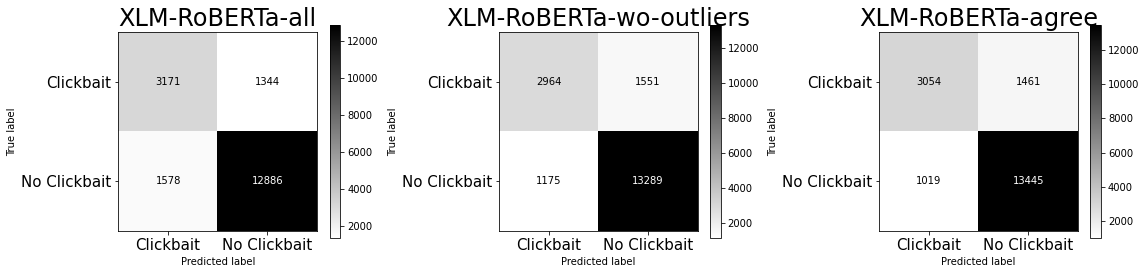

<Figure size 3600x2400 with 0 Axes>

'/content/drive/MyDrive/Research/clickbait/confusion_matrix.pdf'

In [29]:
print_confusion_matrix(classifiers,root)

**Comentarios** Se pueden ver en las tablas que para detectar si el tweet es un "clickbait", el enfoque con solamente datos con buen acuerdo es el mejor. Al quedarse con las anotaciones con buena confianza, es más fácil discernir al modelo entre extremos de sí/no clickbait. De todas maneras, se pueden probar enfoques de ensemble o una simple votación por mayoría entre estos 3 approaches, porque según la matrix podría resultar beneficioso. XLM-RoBERTa-all es el mejor prediciendo la clase clickbait, por detrás viene XLM-RoBERTa-agree, siende este último el mejor para la clase no_clickbait, y el segundo, XLM-RoBERTa-wo-outliers.